In [62]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import math
import numpy as np

In [5]:
# Reads results csv files into df
def read_csv(path):
    csv_files = glob.glob(path + "/*.csv")
    df_list = (pd.read_csv(file) for file in csv_files)
    full_df = pd.concat(df_list, ignore_index=True)
    full_df.columns = [c.replace(' ', '_') for c in full_df.columns]
    return full_df

In [6]:
# Separates and plots rewards
r_disc = -11 # reward for discarded product
def plot_reward(df, r_nex, title, lr = None):
    # Multiple number of nonexistent issues by r_nex
    reward_nex = r_nex * df['issued_but_nonexistent']
    # Reward for issued but discarded
    reward_disc = r_disc * df['issued_but_discarded']
    # Reward for outdated products
    reward_out = -1 * df['num_outdates']

    # Remaining reward
    reward_rem = df['reward'] - reward_disc - reward_nex - reward_out

    plt.plot(savgol_filter(reward_disc, window_length=200, polyorder=2), label='discarded')
    plt.plot(savgol_filter(reward_rem, window_length=200, polyorder=2), label='good')
    plt.plot(savgol_filter(reward_nex, window_length=200, polyorder=2), label='non existing')
    plt.plot(savgol_filter(reward_out, window_length=200, polyorder=2), label='outdates')

    plt.legend(loc="lower right")

    plt.xlabel('Days')
    plt.ylabel('Reward')
    plt.title(title)

    plt.show()

In [76]:
def mov_avg(data):
    data = np.array(data)
    window_width = 1000
    cumsum_vec = np.cumsum(np.insert((data), 0, 0))
    ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    return ma_vec

In [77]:
def plot_multi(dfs):

    r_nex = -50
    r_disc = -11

    cols = 2
    rows = math.ceil(len(dfs) / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(16,12))
    dict_keys = [k for k in dfs.keys()]

    l = 0
    for i in range(rows):
        for j in range(cols):
            if len(dfs) == l:
                break
            else:
                key = dict_keys[l]
                # Reward non-existing
                reward_nex = r_nex * dfs[key]['issued_but_nonexistent']
                # Reward for issued but discarded
                reward_disc = r_disc * dfs[key]['issued_but_discarded']
                # Outdated product reward  = -1
                reward_out = -1*dfs[key]['num_outdates']

                # Remaining reward
                # reward_rem = dfs[key]['reward'] - reward_disc - reward_nex - reward_out

                axes[i][j].plot(mov_avg(reward_disc), label='discarded')
                axes[i][j].plot(mov_avg(reward_nex), label='non-existing')
                axes[i][j].plot(mov_avg(reward_out), label='outdated')
                # axes[i][j].plot(savgol_filter(reward_rem, window_length=200, polyorder=2), label='compatible')
                axes[i][j].legend(loc = 'lower right')
                axes[i][j].set_title(dict_keys[l])
            l += 1

    plt.show()

In [108]:
def plot_multi_satisfied(dfs):
    cols = 2
    rows = math.ceil(len(dfs) / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(16,12))
    dict_keys = [k for k in dfs.keys()]

    l = 0
    for i in range(rows):
        for j in range(cols):
            if len(dfs) == l:
                break
            else:
                key = dict_keys[l]
                # Number satisfied requests
                s = dfs[key]['num_units_requested'] - dfs[key]['issued_but_nonexistent'] - dfs[key]['issued_but_discarded']
                r = dfs[key]['num_units_requested']
                perc = np.array(s/r)

                x = [*range(0, 24550, 982)]

                axes[i][j].plot(mov_avg(perc), label='percentage satisifed')
                [axes[i][j].axvline(_x, linewidth=0.40, color='b') for _x in x]

                axes[i][j].legend(loc = 'lower right')
                axes[i][j].set_title(dict_keys[l])
            l += 1

    plt.show()

In [84]:
def plot_satisfied(df, title):
    s = df['num_units_requested'] - df['issued_but_nonexistent'] - df['issued_but_discarded']
    r = df['num_units_requested']
    perc = np.array(s/r)

    window_width = 2000
    cumsum_vec = np.cumsum(np.insert((perc), 0, 0))
    ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

    plt.plot(ma_vec, label='satisfied')

    plt.legend(loc="lower right")

    plt.ylabel('Number units')
    plt.xlabel('Days')

    plt.title(title)

    plt.show()
    return

In [136]:
def plot_loss_multi(dfs):
    dict_keys = [k for k in dfs.keys()]

    for k in dict_keys:
        plt.plot(mov_avg(dfs[k]['day_loss']), label=k)

    plt.legend(loc = 'lower right')
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Days')

    plt.show()

### Network architecture
#### Input size

```
input_size = len(np.ravel(self.env.state))
```
output = number of actions (8)
state dimension = 8 x 8
8:   number of blood groups
9:   max age (5) + max lead time (3) + current request (1)

input
size = 8 * 9 = 72

#### Model
```
input -> [64, relu] -> [64, relu] -> [output, linear]
```

### 1 Epsilon tests

Alpha = 0.001
Episode = 2.5 years
25 episodes

In [112]:
e02 = read_csv('results/request_scratch/a0.001_g0.99_b50/64_64/e0.2/target_False/target_250')
e04 = read_csv('results/request_scratch/a0.001_g0.99_b50/64_64/e0.4/target_False/target_250')
e06 = read_csv('results/request_scratch/a0.001_g0.99_b50/64_64/e0.6/target_False/target_250')
e08 = read_csv('results/request_scratch/a0.001_g0.99_b50/64_64/e0.8/target_False/target_250')

epsilons = {'ε = 0.2':e02, 'ε = 0.4':e04, 'ε = 0.6':e06, 'ε = 0.8':e08}

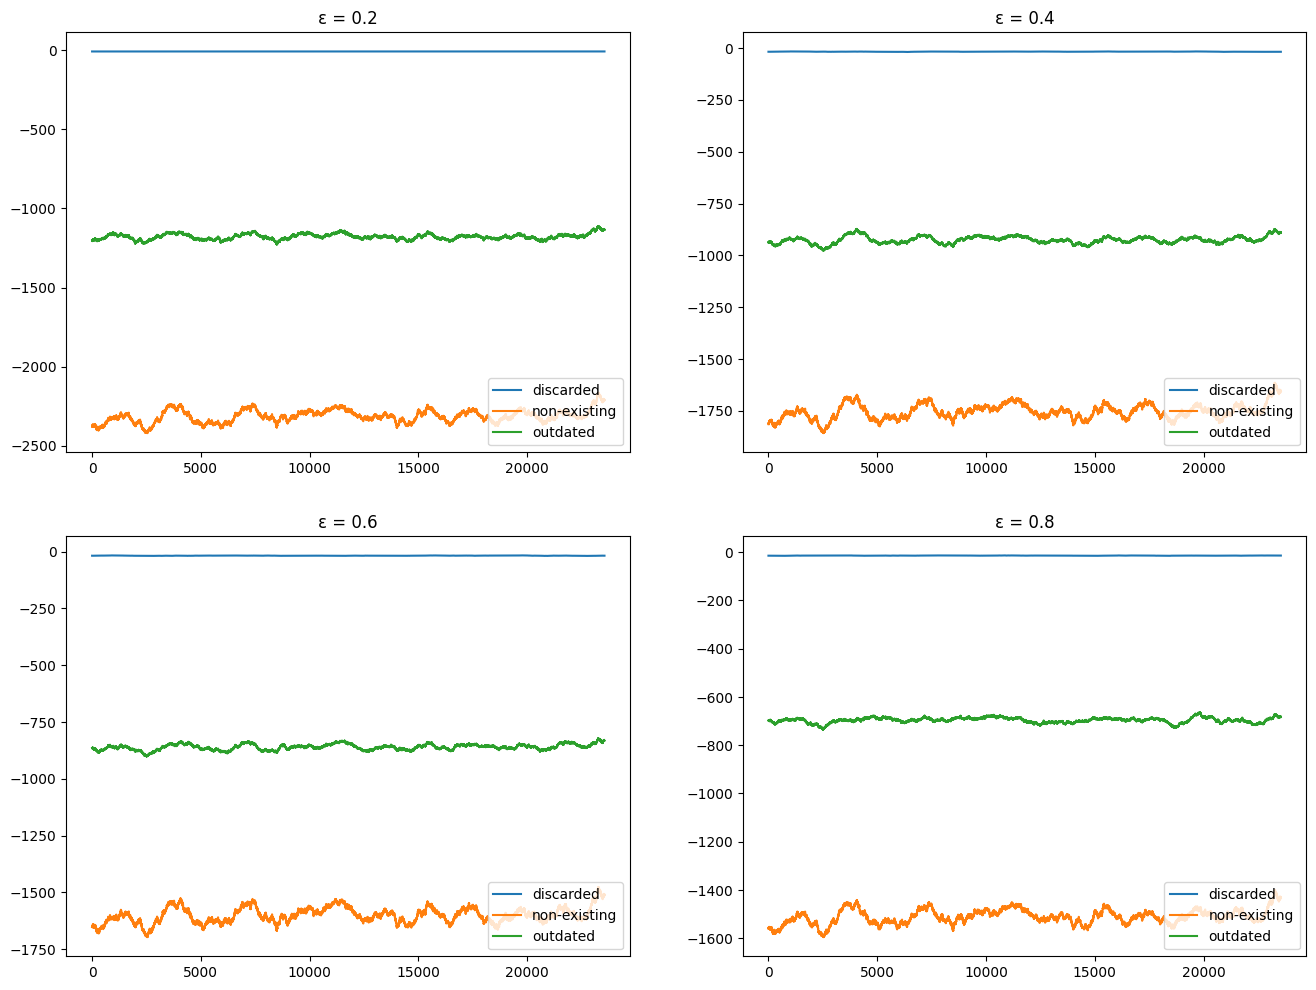

In [80]:
plot_multi(epsilons)

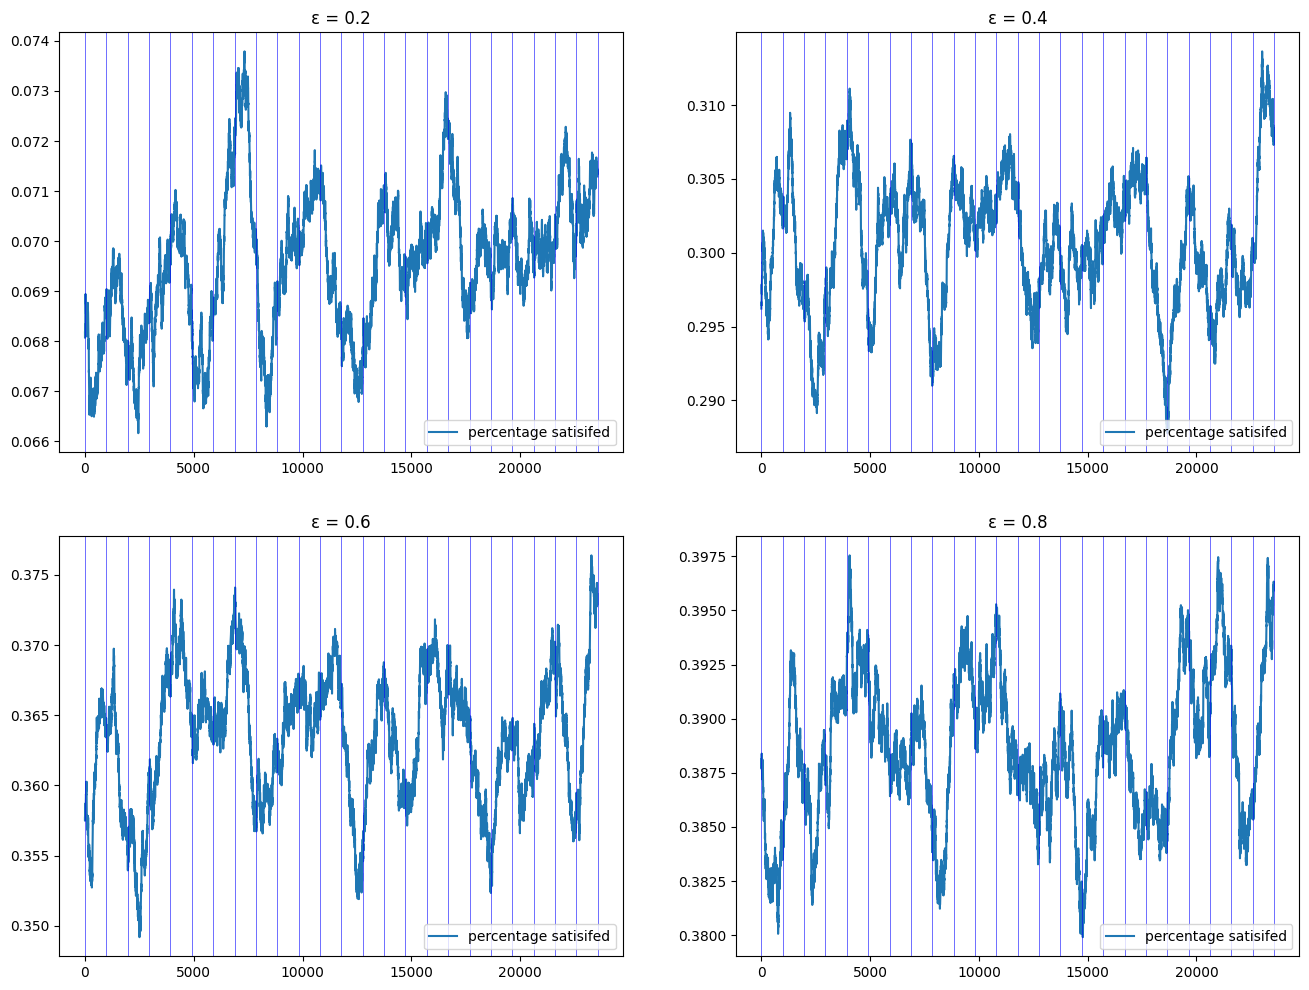

In [109]:
plot_multi_satisfied(epsilons)

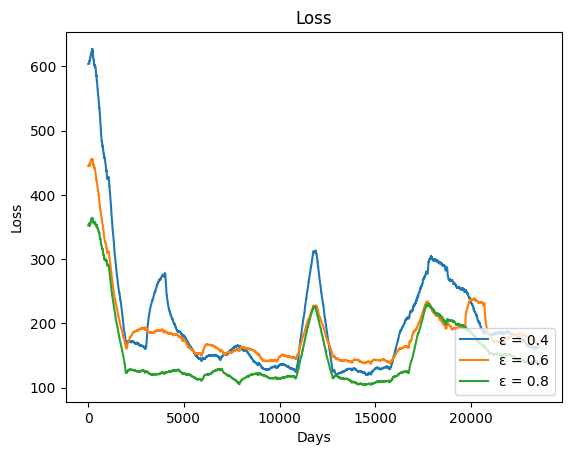

In [141]:
epsilons_468 = {'ε = 0.4':e04, 'ε = 0.6':e06, 'ε = 0.8':e08}
plot_loss_multi(epsilons_468)

### 2 Target network frequency tests

Epsilon = 0.4
Alpha = 0.001
Episode = 2.5 years
25 episodes

In [111]:
t100 = read_csv('results/request_scratch/a0.001_g0.99_b50/64_64/e0.4/target_True/target_100')
t250 = read_csv('results/request_scratch/a0.001_g0.99_b50/64_64/e0.4/target_True/target_250')
t500 = read_csv('results/request_scratch/a0.001_g0.99_b50/64_64/e0.4/target_True/target_500')
t750 = read_csv('results/request_scratch/a0.001_g0.99_b50/64_64/e0.4/target_True/target_750')

targets = {'N = 100':t100, 'N = 250':t250, 'N = 500':t500, 'N = 750':t750}

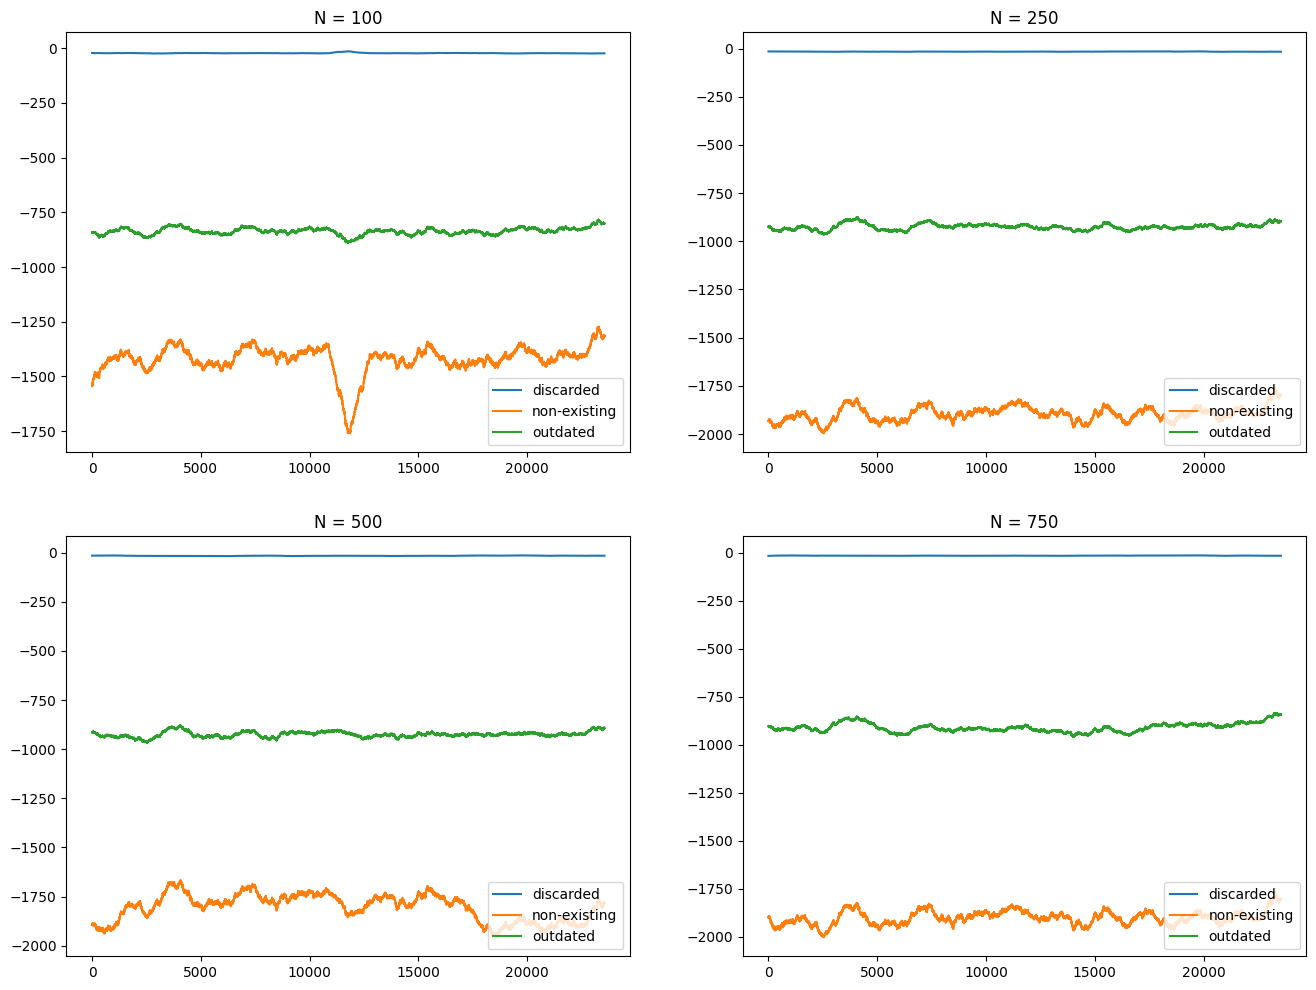

In [113]:
plot_multi(targets)

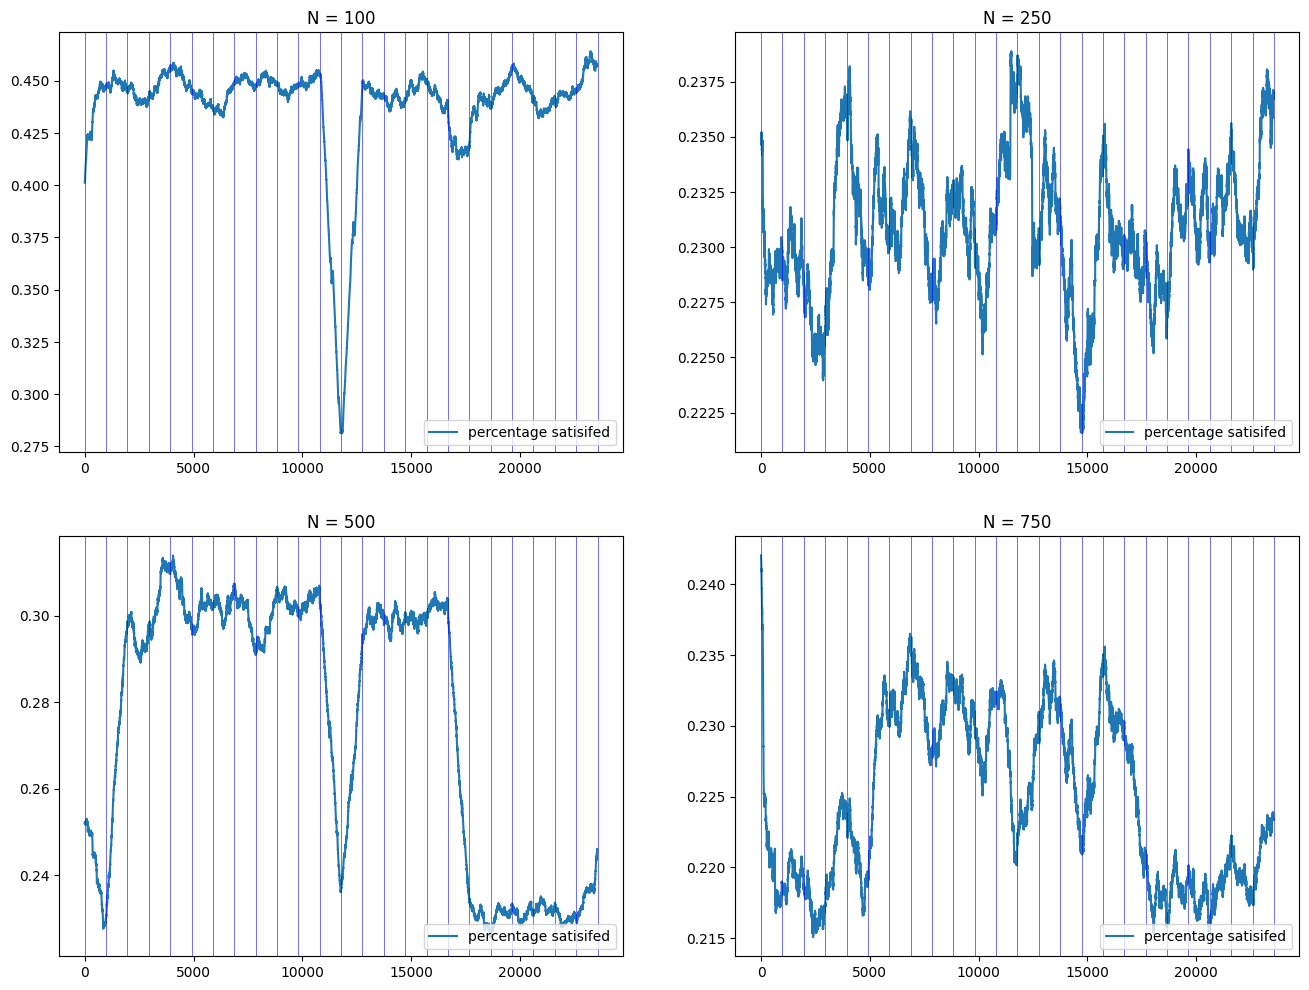

In [114]:
plot_multi_satisfied(targets)

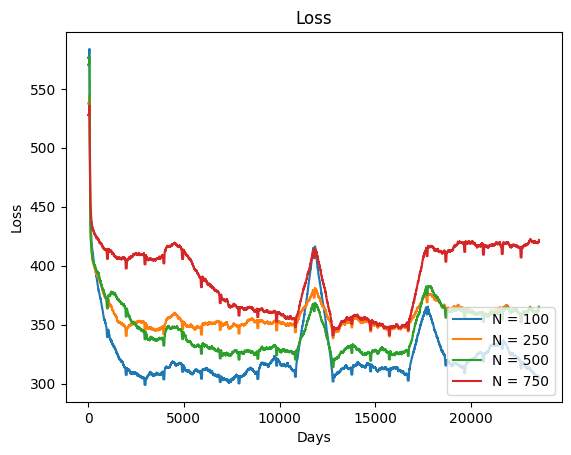

In [137]:
plot_loss_multi(targets)

In [168]:
def describe(df, stats):
    d = df.describe()
    return d.append(df.reindex(d.columns, axis = 1).agg(stats))

In [176]:
columns = ['num_units_requested', 'num_supplied_products', 'reward', 'day_loss', 'issued_but_nonexistent', 'issued_but_discarded', 'num_outdates', 'num_shortages']
episode13 = e08[11784:12766]

In [177]:
def linear_anneal(t,T,start,final,percentage):
    ''' Linear annealing scheduler
    t: current timestep
    T: total timesteps
    start: initial value
    final: value after percentage*T steps
    percentage: percentage of T after which annealing finishes
    '''
    final_from_T = int(percentage*T)
    if t > final_from_T:
        return final
    else:
        return final + (start - final) * (final_from_T - t)/final_from_T

In [185]:
linear_anneal(8, 25, 1, 0.1, 0.8)

0.64